# Flight Delay Analysis and Prediction


## By Dong Zhang


## Introduction

Most people have flight delay experiences. Sometimes flight delays (including cancellations) can be a really big issue, especially for business trips or emergency flights. Flight delays are caused by various reasons, also depend on flight companies and airports. In this project, I try to classify and predict flight delays using machine learning techniques. I use the data of flight delays downloaded from the Bureau of Transportation Statistics. More data are required for better prediction.  

### Data 

The dataset is from the Bureau of Transportation Statistics:
https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?pn=1

Data is collected between June, 2003 to Feb, 2019, from all airports and airlines in the US. Flight delays can be caused by different reasons, including Air Carrier Delay, Weather Delay, National Aviation System (NAS) Delay, Security Delay, Aircraft Arriving Delay, Cancellation and Diverted. The definitions of the variety of delays can be see here:
https://www.bts.dot.gov/explore-topics-and-geography/topics/airline-time-performance-and-causes-flight-delays

Each row of the data shows the number of total flights, the number of each type of delays, and the duration (in minutes) of each delay for an individual flight airline in an individual airports in one month. So this is not the raw data, but we can still learning much information from the data. Eventually, my goal is to predict the probability and waiting time of each delay cause. For this project, I take American Airline and Atlanta Airport (ATL) for case studies, compare them with the overall flight performance in the US. Then given the parameter set of year and month, I predict flight delays for AA/ATL. 

Other data includes the longitudes and latitudes of airports in the US (airport.csv). In future I will collect more data including not only the information by years and months, but also dates and hours. More data can be collected here:
https://transtats.bts.gov/ONTIME/Departures.aspx

In current stages, the data already shows many interesting results. 


### Tools

-- **Language**: Python, with packages pandas, seaborn, numpy, etc.

-- **Visualization**: matplotlib, basemap

-- **Machine Learning**: scikit-learn package. Classification: Logistic, Random Forest, k-Nearest Neighbors, Decision Tree, Support Vector Machine (SVM), Gaussian Process. Regression: Linear, Polynomial, Regularization, SVM, BayesianRidge


### Content

This notebook includes five parts. The brief summary is as follows. 

**1. Loading and Cleaning Data** 

I use two csv files, then remove null data. 

**2. Flight Delays in Individual Airports on the Map and Delay Classification**

I use basemap to show the flight performance in individual airports all over the US, by computing the averaged delay rate (percentage), averaged delay time in every airport. According to the distribution of delay rates in the US, I sort all airports into several groups, then use **supervised ML classification** techniques to classify the US territory into several groups according to flight performance: worst, bad, moderate, and fine. 


**3. Machine Learning Modeling**

Airline and airport information included for multi-class and binary classification ML modeling. The precision rate reaches 


## Part 1: Data Loading and Cleaning


In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) 

data = pd.read_csv('airline_delay.csv')
print(data.shape)
data.head(5)

(256285, 21)


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2003,6,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",307.0,56.0,14.68,10.79,19.09,1.48,9.96,1.0,1.0,2530.0,510.0,621.0,676.0,25.0,698.0
1,2003,6,AA,American Airlines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",90.0,27.0,7.09,2.00,10.75,0.00,7.16,0.0,0.0,1390.0,271.0,83.0,581.0,0.0,455.0
2,2003,6,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",752.0,186.0,33.99,27.82,104.76,1.90,17.53,5.0,0.0,8314.0,1367.0,1722.0,3817.0,139.0,1269.0
3,2003,6,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",842.0,174.0,60.24,20.54,47.78,4.69,40.75,9.0,1.0,8344.0,3040.0,1032.0,1835.0,115.0,2322.0
4,2003,6,AA,American Airlines Inc.,BDL,"Hartford, CT: Bradley International",383.0,55.0,14.90,8.91,14.57,0.00,16.61,0.0,0.0,3137.0,815.0,574.0,555.0,0.0,1193.0


In [2]:
data.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            362
arr_del15              416
carrier_ct             362
weather_ct             362
nas_ct                 362
security_ct            362
late_aircraft_ct       362
arr_cancelled          362
arr_diverted           362
arr_delay              362
carrier_delay          362
weather_delay          362
nas_delay              362
security_delay         362
late_aircraft_delay    362
dtype: int64

In [3]:
data.dropna(inplace = True)

In [4]:
print(data.shape)
data.isnull().sum()

(255869, 21)


year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [5]:
# No duplication

data[data.duplicated(keep=False)]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay



## Part 2: Visualization


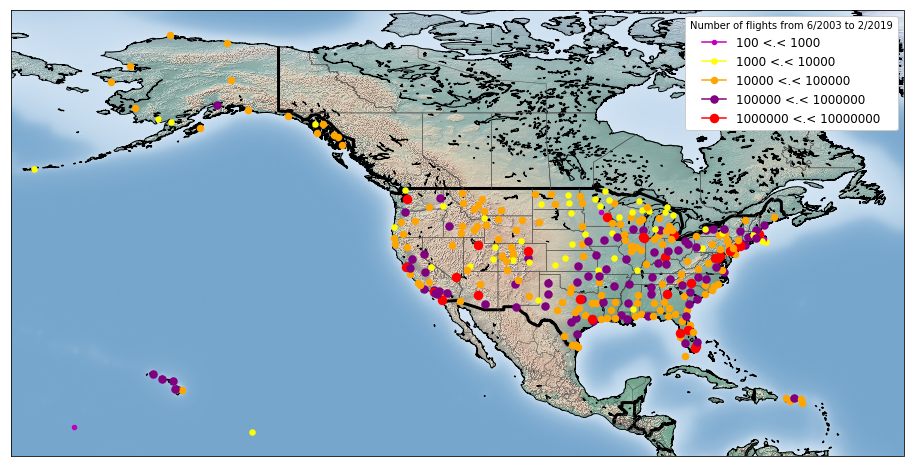

In [6]:
from collections import OrderedDict
from mpl_toolkits.basemap import Basemap

airports = pd.read_csv("airports.csv")

#count_flights = data['airport'].value_counts()
count_flights = data.groupby('airport', as_index=False).agg({'arr_flights': 'sum'})

plt.figure(figsize=(16,16))
#________________________________________
# define properties of markers and labels
colors = ['lightblue', 'm','yellow', 'orange', 'purple', 'red' ]
size_limits = [1, 100, 1000, 10000, 100000, 1000000, 10000000]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 
#____________________________________________________________
map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 3)
map.drawstates(color='0.3')
#_____________________
# put airports on map
for index, (code, y,x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    val0 = count_flights[count_flights.airport==code].arr_flights.item()
    isize = [i for i, val in enumerate(size_limits) if val < val0]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+3, 
             markeredgewidth = 1.5, color = colors[ind], label = labels[ind])

#_____________________________________________
# remove duplicate labels and set their order
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ('100 <.< 1000', '1000 <.< 10000'
             ,'10000 <.< 100000', '100000 <.< 1000000', '1000000 <.< 10000000')
new_label = OrderedDict()
for key in key_order:
    new_label[key] = by_label[key]
    #print(key,by_label[key])
plt.legend(new_label.values(), new_label.keys(), loc = 'best', prop= {'size':12},
           title='Number of flights from 6/2003 to 2/2019', frameon = True, framealpha = 1)
plt.show()

**Discussion for the Above Figure:** The total number of flights are sum up for individual airports, and distributed on the US map. Tens of airports (red dots) are very busy, among them ATL and ORD are the busiest. The data from ATL and AA will be collected for case studies. 


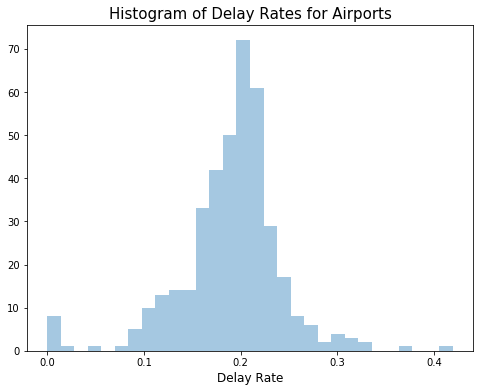

In [7]:
count_delays = data.groupby('airport', as_index=False).agg({'arr_del15': 'sum'})

count_delays['delay_rate'] = count_delays['arr_del15']/count_flights['arr_flights']
count_delays = count_delays[count_delays['delay_rate'] < 1.0]

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.distplot(count_delays['delay_rate'],bins=30,kde=False)
ax.set_title('Histogram of Delay Rates for Airports',size='15')
ax.set_xlabel('Delay Rate',size='12')
plt.show()

**Discussion for the Above Figure:** The **Averaged Delay Rate** in a single airport (total number of flight delays: total number of flights) is calculated and shown as a statistic histogram. We find that delay rates are peaked around 0.2 (20%), which means most airports have $\sim\,$20% delay rate. More sophisticated analysis is following.

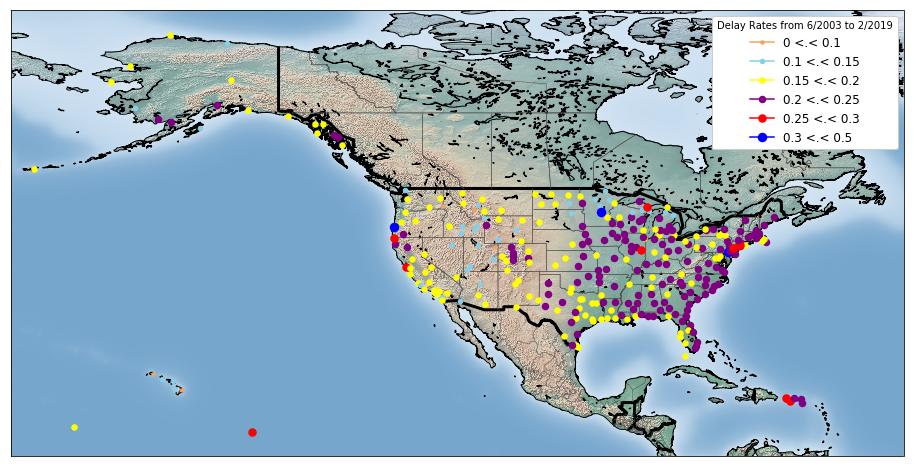

In [8]:
plt.figure(figsize=(16,16))
#________________________________________
# define properties of markers and labels
colors = ['sandybrown','skyblue', 'yellow', 'purple', 'red','blue' ]
size_limits = [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1]))

#labels

#____________________________________________________________
map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 3)
map.drawstates(color='0.3')

for index, (code, y,x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    val0 = count_delays[count_delays.airport==code].delay_rate.item()
    isize = [i for i, val in enumerate(size_limits) if val < val0]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+3, 
             markeredgewidth = 1.5, color = colors[ind], label = labels[ind])
    #print(index,val0,isize)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

#print(by_label)

key_order = ('0 <.< 0.1', '0.1 <.< 0.15','0.15 <.< 0.2', 
             '0.2 <.< 0.25','0.25 <.< 0.3', '0.3 <.< 0.5')
new_label = OrderedDict()
for key in key_order:
    new_label[key] = by_label[key]
    #print(key,by_label[key])

plt.legend(new_label.values(), new_label.keys(), loc = 'best', prop= {'size':12},
           title='Delay Rates from 6/2003 to 2/2019', frameon = True, framealpha = 1)
plt.show()

**Discussion for the Above Map:** The Averaged Delay Rate in each airport is distributed on the map as one dot. Interestingly, we find that the flight performance is better in the West compared to the East. A more elaborate classification is needed. 


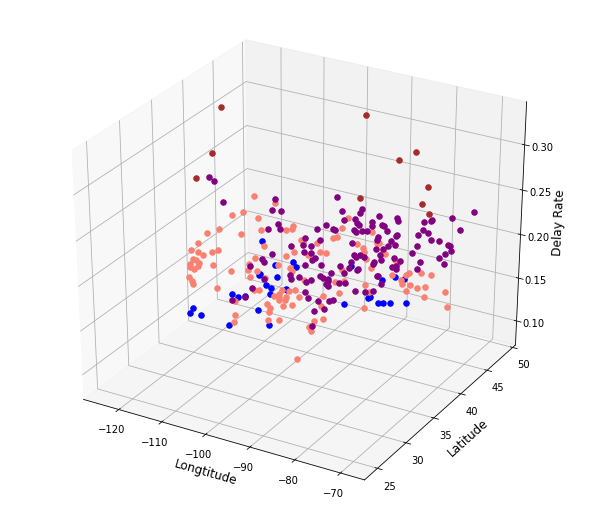

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,7))
#________________________________________
# define properties of markers and labels
colors = ['blue', 'salmon', 'purple', 'brown']
size_limits = [0, 0.15, 0.2, 0.25, 0.5]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1]))

ax = Axes3D(fig)
ax.set_xlabel('Longtitude',size=12)
ax.set_ylabel('Latitude',size=12)
ax.set_zlabel('Delay Rate',size=12)

Sort_X = []
Sort_Y = []

for index, (code, y,x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    if (x>-130 and x<-50 and y > 20 and y< 60):
        x, y = map(x, y)
        val0 = count_delays[count_delays.airport==code].delay_rate.item()
        Sort_X.append([x,y])
        isize = [i for i, val in enumerate(size_limits) if val < val0]
        ind = isize[-1]
        Sort_Y.append(ind)
        ax.scatter(x, y, val0, marker='o', s=30, color = colors[ind])

Sort_X = np.array(Sort_X)
Sort_Y = np.array(Sort_Y)

**Discussion for the Above 3D Figure:** Delay Rates are classified into four groups: <0.15 (Fine), 0.15 - 0.2 (Moderate), 0.2-0.25 (Bad), 0.25 - 0.5 (Worst). An extra dimension is introduced for groups. A 3D Figure is better to show the data with two features (longtitude and latitude), and one characteristic classification (level). Now I introduce machine learning classifiers. 

Random Forest Accuracy: 0.9583333333333334
Random Forest Confusion Matrix:
 [[ 30   2   0   0]
 [  0 113   3   0]
 [  2   1 127   0]
 [  2   0   2   6]]
K-Nearest Neighbors Accuracy: 0.7604166666666666
K-Nearest Neighbors Confusion Matrix:
 [[ 25   6   1   0]
 [  7  82  27   0]
 [  4  14 111   1]
 [  2   1   6   1]]
Decision Tree Accuracy: 0.9618055555555556
Decision Tree Confusion Matrix:
 [[ 32   0   0   0]
 [  3 113   0   0]
 [  0   4 126   0]
 [  0   3   1   6]]
Gaussian Process Accuracy: 0.9027777777777778
Gaussian Process Confusion Matrix:
 [[ 30   2   0   0]
 [  0 106  10   0]
 [  0   9 121   0]
 [  1   1   5   3]]


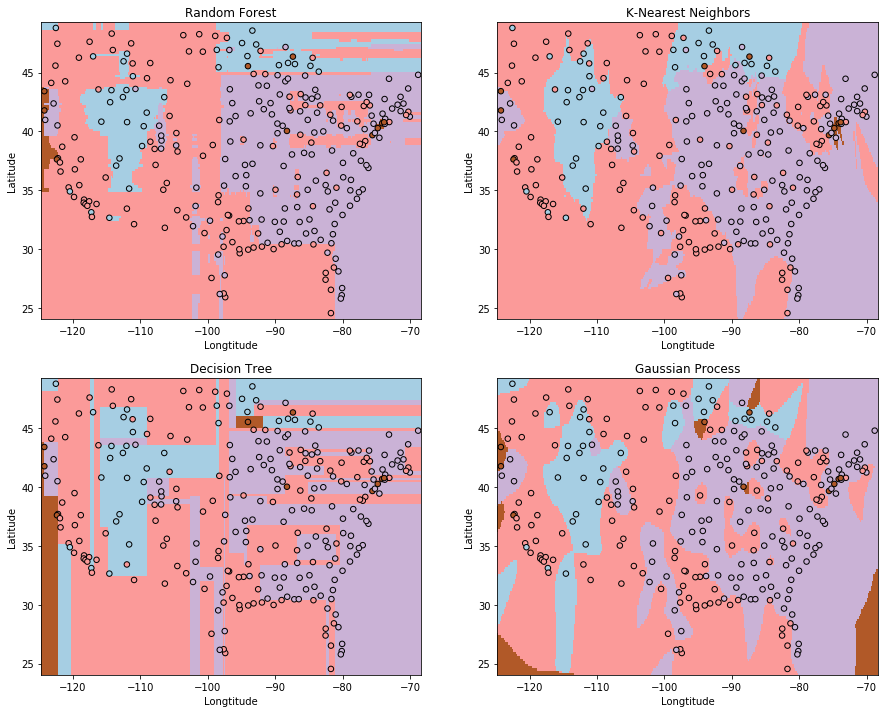

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score

X = Sort_X
Y = Sort_Y

h = 0.2
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

models = (RandomForestClassifier(n_estimators=200,min_samples_split=5),
          KNeighborsClassifier(n_neighbors=5),
          DecisionTreeClassifier(min_samples_split=3,random_state=10),
          GaussianProcessClassifier(random_state=10))
models = (clf.fit(X, Y) for clf in models)

titles = ('Random Forest','K-Nearest Neighbors','Decision Tree','Gaussian Process')

fig = plt.figure(figsize=(15,12))
panels = [fig.add_subplot(221),fig.add_subplot(222),fig.add_subplot(223),fig.add_subplot(224)]

for clf, title, ax in zip(models, titles, panels):
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    acc = accuracy_score(Y, clf.predict(X))
    
    print(title + ' Accuracy:', acc)
    print(title + ' Confusion Matrix:\n',confusion_matrix(Y,clf.predict(X)))
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z,cmap=plt.cm.Paired)
    ax.scatter(X[:,0], X[:,1],c=Y,cmap=plt.cm.Paired, s=30, edgecolors='k')
    ax.set_xlabel('Longtitude')
    ax.set_ylabel('Latitude')
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

**Discussion for the Above Figure:** Using the sklearn Random Forest, KNN, Decision Tree and Gaussian Process Classifiers, we classify the US land (no Alaska, Hawaii and Puerto Rico, sorry!) into several areas depending on the flight performance: Worst (brown), Bad (light purple), Moderate (pink), and Fine (light blue).  

**Comments on the Classification:** 

We use the accuracy_score function from sklearn.metrics to evaluate four classifications. We find that Random Forest, Decision Tree and Gaussian Process give accuracy higher than **> 90%**, which is pretty good. Note that we do not split the data into testing and traing parts, so the scores are only for the set of training data. On the other hand, the boundaries given by Random Forest and Decision Tree are less smooth than those given by KNN or Gaussian Process (Random Forest may still be okay, but Decision Tree gives weird boundaries!). From this point of view, KNN and Gaussian Process are better than Decision Tree, while Random Forest still looks fine.  My **First Conclusion** is that, Gaussian Process is are better than other classification methods for this problem, while Random Forest is also good. 


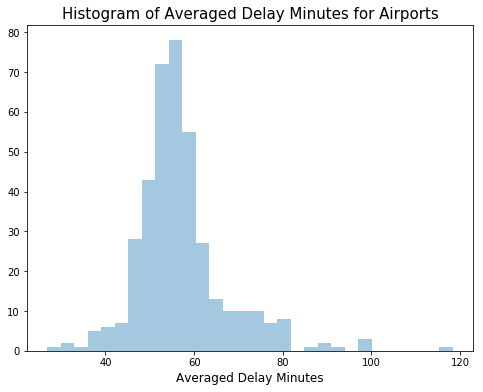

In [11]:
data_temp = data.groupby('airport', as_index=False).agg({'arr_delay': 'sum'})
count_delays['delay_min']=data_temp['arr_delay']/count_delays['arr_del15']

count_delays = count_delays[count_delays['delay_min'] < 120.0]

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.distplot(count_delays['delay_min'],bins=30,kde=False)
ax.set_title('Histogram of Averaged Delay Minutes for Airports',size='15')
ax.set_xlabel('Averaged Delay Minutes',size='12')
plt.show()

Then we study the **Averaged Delay Minutes** in each airport (total delay minutes to the total number of delay flights in each airport). The histogram shows the statistics of delay performance for all airports. Most delays are around one hour. Next we study the averaged delay duration in each airport distributed on the US map. 


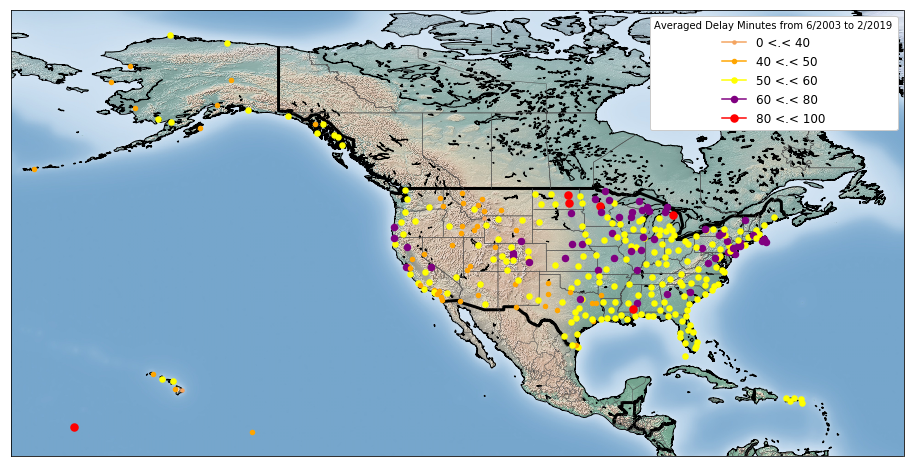

In [12]:
plt.figure(figsize=(16,16))
#________________________________________
# define properties of markers and labels
colors = ['sandybrown','orange', 'yellow', 'purple', 'red','blue' ]
size_limits = [0, 40, 50, 60, 80, 100, 120]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1]))

labels

#____________________________________________________________
map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 3)
map.drawstates(color='0.3')

for index, (code, y,x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    val0 = count_delays[count_delays.airport==code].delay_min.item()
    isize = [i for i, val in enumerate(size_limits) if val < val0]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+3, 
             markeredgewidth = 1.5, color = colors[ind], label = labels[ind])
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

#print(by_label)

key_order = ('0 <.< 40', '40 <.< 50','50 <.< 60', 
             '60 <.< 80','80 <.< 100')
new_label = OrderedDict()
for key in key_order:
    new_label[key] = by_label[key]
    #print(key,by_label[key])

plt.legend(new_label.values(), new_label.keys(), loc = 'best', prop= {'size':12},
           title='Averaged Delay Minutes from 6/2003 to 2/2019', frameon = True, framealpha = 1)
plt.show()

Again, it shows that the delay duration is typically shorter in some West area. Mostly, the typical delay duration is **50 - 60 minutes**. I skip the classification work. Now we go to the third part. 

##  Part 3. Machine Learning Model

### 3.1 Multiple Classification

In [13]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

data_ML = data.drop(['carrier_name','airport_name'], axis=1)
print(data_ML.shape)
data_ML = data_ML[['year','month','carrier','arr_flights','arr_del15']]
data_ML.groupby(['year','month','carrier','arr_flights']).sum()
print(data_ML.shape)
data_ML['delay_rate'] = data_ML.arr_del15/data_ML.arr_flights
data_ML['year'] = (data_ML.year-2003.)/2019
data_ML['month'] = data_ML.month/12


col         = 'delay_rate'
conditions  = [ data_ML[col] <=0.15, (data_ML[col] >0.15) & (data_ML[col]<= 0.20), 
               (data_ML[col] >0.20) & (data_ML[col]<= 0.25), data_ML[col]> 0.25]
choices     = [0, 1, 2, 3]

data_ML['class'] = np.select(conditions, choices, default=np.nan)
data_ML['class'] = data_ML['class'].astype(int)

data_ML.head(10)

(255869, 19)
(255869, 5)


,year,month,carrier,arr_flights,arr_del15,delay_rate,class
0,0.0,0.5,AA,307.0,56.0,0.182410,1
1,0.0,0.5,AA,90.0,27.0,0.300000,3
2,0.0,0.5,AA,752.0,186.0,0.247340,2
3,0.0,0.5,AA,842.0,174.0,0.206651,2
4,0.0,0.5,AA,383.0,55.0,0.143603,0
5,0.0,0.5,AA,89.0,12.0,0.134831,0
6,0.0,0.5,AA,445.0,82.0,0.184270,1
7,0.0,0.5,AA,1266.0,225.0,0.177725,1
8,0.0,0.5,AA,119.0,27.0,0.226891,2
9,0.0,0.5,AA,593.0,101.0,0.170320,1


In [14]:
data_dummy = pd.get_dummies(data_ML.drop(['arr_flights','arr_del15','delay_rate'],axis=1))
data_dummy.head()

,year,month,class,carrier_9E,carrier_AA,carrier_AQ,carrier_AS,carrier_B6,carrier_CO,carrier_DH,carrier_DL,carrier_EV,carrier_F9,carrier_FL,carrier_G4,carrier_HA,carrier_HP,carrier_MQ,carrier_NK,carrier_NW,carrier_OH,carrier_OO,carrier_RU,carrier_TZ,carrier_UA,carrier_US,carrier_VX,carrier_WN,carrier_XE,carrier_YV,carrier_YX
0,0.0,0.5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.5,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.5,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.5,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
y = data_dummy['class']
X = data_dummy.drop('class', axis=1)

X.head()

,year,month,carrier_9E,carrier_AA,carrier_AQ,carrier_AS,carrier_B6,carrier_CO,carrier_DH,carrier_DL,carrier_EV,carrier_F9,carrier_FL,carrier_G4,carrier_HA,carrier_HP,carrier_MQ,carrier_NK,carrier_NW,carrier_OH,carrier_OO,carrier_RU,carrier_TZ,carrier_UA,carrier_US,carrier_VX,carrier_WN,carrier_XE,carrier_YV,carrier_YX
0,0.0,0.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
y.value_counts()

0    81182
3    74695
1    54360
2    45632
Name: class, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
logreg =LogisticRegression(penalty='l2', solver='lbfgs')

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
#fpr_log, tpr_log, _ = roc_curve(y_test, y_pred)

#print(f1_score(y_test, y_pred))
#print(precision_score(y_test, y_pred))
#print(recall_score(y_test, y_pred))

print("confusion matrix: \n", confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

confusion matrix: 
 [[9534  493    0 6131]
 [4950  623    0 5234]
 [3593  559    0 5076]
 [5067  478    0 9436]]
              precision    recall  f1-score   support

           0       0.41      0.59      0.49     16158
           1       0.29      0.06      0.10     10807
           2       0.00      0.00      0.00      9228
           3       0.36      0.63      0.46     14981

    accuracy                           0.38     51174
   macro avg       0.27      0.32      0.26     51174
weighted avg       0.30      0.38      0.31     51174



In [19]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(min_samples_split=3,random_state=20)

DT.fit(X_train,y_train)
y_pred =DT.predict(X_test)

print("confusion matrix: \n", confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

confusion matrix: 
 [[11886  1769   405  2098]
 [ 4869  2467   840  2631]
 [ 2383  1810  1046  3989]
 [ 2001  1211   935 10834]]
              precision    recall  f1-score   support

           0       0.56      0.74      0.64     16158
           1       0.34      0.23      0.27     10807
           2       0.32      0.11      0.17      9228
           3       0.55      0.72      0.63     14981

    accuracy                           0.51     51174
   macro avg       0.45      0.45      0.43     51174
weighted avg       0.47      0.51      0.47     51174



In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, max_features = 3,random_state=20,oob_score=True)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

print("confusion matrix: \n", confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

confusion matrix: 
 [[11775  1828   418  2137]
 [ 4766  2507   847  2687]
 [ 2318  1817  1053  4040]
 [ 1942  1225   915 10899]]
              precision    recall  f1-score   support

           0       0.57      0.73      0.64     16158
           1       0.34      0.23      0.28     10807
           2       0.33      0.11      0.17      9228
           3       0.55      0.73      0.63     14981

    accuracy                           0.51     51174
   macro avg       0.45      0.45      0.43     51174
weighted avg       0.47      0.51      0.47     51174



In [21]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(max_depth=6, learning_rate=0.01, n_estimators=200)

xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

print("confusion matrix: \n", confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

confusion matrix: 
 [[12257   403    42  3456]
 [ 6115   664   148  3880]
 [ 3817   488   219  4704]
 [ 3843   291   142 10705]]
              precision    recall  f1-score   support

           0       0.47      0.76      0.58     16158
           1       0.36      0.06      0.10     10807
           2       0.40      0.02      0.04      9228
           3       0.47      0.71      0.57     14981

    accuracy                           0.47     51174
   macro avg       0.42      0.39      0.32     51174
weighted avg       0.43      0.47      0.38     51174



### 3.2 Binary Classification

In [22]:
col         = 'delay_rate'
conditions  = [ data_ML[col] <=0.20, data_ML[col]> 0.20]
choices     = [0, 1]

data_ML['class'] = np.select(conditions, choices, default=np.nan)
data_ML['class'] = data_ML['class'].astype(int)

data_ML.head(10)

,year,month,carrier,arr_flights,arr_del15,delay_rate,class
0,0.0,0.5,AA,307.0,56.0,0.182410,0
1,0.0,0.5,AA,90.0,27.0,0.300000,1
2,0.0,0.5,AA,752.0,186.0,0.247340,1
3,0.0,0.5,AA,842.0,174.0,0.206651,1
4,0.0,0.5,AA,383.0,55.0,0.143603,0
5,0.0,0.5,AA,89.0,12.0,0.134831,0
6,0.0,0.5,AA,445.0,82.0,0.184270,0
7,0.0,0.5,AA,1266.0,225.0,0.177725,0
8,0.0,0.5,AA,119.0,27.0,0.226891,1
9,0.0,0.5,AA,593.0,101.0,0.170320,0


In [23]:
data_dummy = pd.get_dummies(data_ML.drop(['arr_flights','arr_del15','delay_rate'],axis=1))
y = data_dummy['class']
X = data_dummy.drop('class', axis=1)
y.value_counts()

0    135542
1    120327
Name: class, dtype: int64

In [24]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
logreg =LogisticRegression(penalty='l2', solver='lbfgs')

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred)

print("confusion matrix: \n", confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

confusion matrix: 
 [[16580 10497]
 [10606 13491]]
              precision    recall  f1-score   support

           0       0.61      0.61      0.61     27077
           1       0.56      0.56      0.56     24097

    accuracy                           0.59     51174
   macro avg       0.59      0.59      0.59     51174
weighted avg       0.59      0.59      0.59     51174



In [26]:
DT = DecisionTreeClassifier(min_samples_split=3,random_state=20)
DT.fit(X_train,y_train)
y_pred =DT.predict(X_test)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)

print("confusion matrix: \n", confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

confusion matrix: 
 [[20863  6214]
 [ 6974 17123]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     27077
           1       0.73      0.71      0.72     24097

    accuracy                           0.74     51174
   macro avg       0.74      0.74      0.74     51174
weighted avg       0.74      0.74      0.74     51174



In [30]:
rf_model = RandomForestClassifier(n_estimators=200, max_features=5,random_state=20,oob_score=True)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)

print("confusion matrix: \n", confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

confusion matrix: 
 [[20749  6328]
 [ 6868 17229]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     27077
           1       0.73      0.71      0.72     24097

    accuracy                           0.74     51174
   macro avg       0.74      0.74      0.74     51174
weighted avg       0.74      0.74      0.74     51174



In [31]:
xgb = XGBClassifier(max_features =5, learning_rate=0.01, n_estimators=200)

xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred)

print("confusion matrix: \n", confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

confusion matrix: 
 [[19859  7218]
 [10400 13697]]
              precision    recall  f1-score   support

           0       0.66      0.73      0.69     27077
           1       0.65      0.57      0.61     24097

    accuracy                           0.66     51174
   macro avg       0.66      0.65      0.65     51174
weighted avg       0.66      0.66      0.65     51174

